# Defining gradient safe priors for hyperparamaters

Gradients explore the defined input-space of an objective function 
here amounting to real numbers $>0$ both $\ell$ and $p$.
A gradient ascent algorithm attempts to find a local maximum by taking steps
along the input in the direction of the gradient multiplied by a step-size
parameter $\alpha$ (normally, $\alpha < 1$)
in order to not overshoot the local maximum it is trying to reach.
 
This results in a problem if the defined prior has boundaries - like the prior 
used in this where for both hyperparameters, we need to ensure:

$\ell, p > 0$.

If the gradient is steep near 0, Venture will happily suggest to take a
gradient step of a size large enough so that we end up on a point outside the
defined boundaries. 

##### Gradient  Safe Priors

We can create a _gradient safe prior_ by changing the interpretation of the step
size of a gradient step would by taking this step in a different space.
We can transform the stochastic process that describes simulator, logPDF and
gradients for the hyperprior in Venture using
[log-logistic](https://en.wikipedia.org/wiki/Log-logistic_distribution) and 
[logit functions](https://en.wikipedia.org/wiki/Logit):

and subsequently computing lengthscale parameter $\ell$ and period $p$ as 

$\ell = - \text{log-logistic}(u)$

$p = - \text{log-logistic}(u)$.

This emulates an exponential prior on hyperparameters which during inference is
less likely drift off to 0 probability spaces near hyperparameters with value 0
without recovering.

In [1]:
%%capture
%load_ext jupyter_probcomp.magics
%matplotlib inline

In [2]:
%ripl --seed 0

Set seed of a new VentureScript RIPL to 0.00.


In [3]:
%%venturescript
assume get_hyper_prior ~ mem((node_index) -> {
    -log_logistic(log_odds_uniform() #hypers:node_index)
});
define samples = mapv((i) -> {run(sample(get_hyper_prior(0)))}, arange(100));

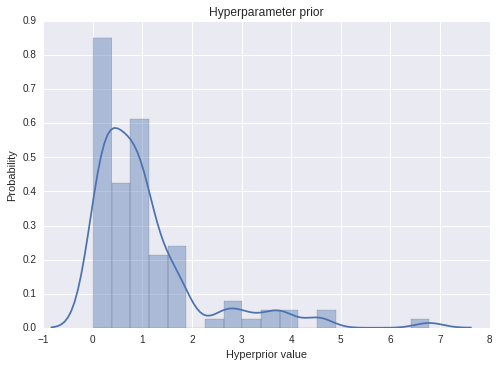

In [4]:
samples = %venturescript samples
import seaborn
ax = seaborn.distplot(samples)
ax.set_xlabel('Hyperprior value')
ax.set_ylabel('Probability')
ax.set_title('Hyperparameter prior')